# Predictive Modelling on 50_Startups dataset

In [1]:
# loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
#loading the dataset
df =pd.read_csv("C:/Users/rajee/Downloads/50_Startups.csv")

In [156]:
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [157]:
state = pd.get_dummies(df['State'],drop_first=True)


In [158]:
state

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0
5,0,1
6,0,0
7,1,0
8,0,1
9,0,0


In [161]:
df.drop(['State'],inplace=True,axis=1)

In [162]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [163]:
df_new = pd.concat((df,state),axis=1)


In [164]:
df_new

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


In [166]:
df_new.columns


Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit', 'Florida',
       'New York'],
      dtype='object')

In [168]:
x = df_new[['R&D Spend', 'Administration', 'Marketing Spend','Florida','New York']]

In [169]:
y = df_new['Profit']

In [170]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=30,test_size=.4)

In [173]:
xtrain.shape

(30, 5)

In [174]:
xtest.shape

(20, 5)

In [176]:
from sklearn.linear_model import LinearRegression

In [177]:
from sklearn.preprocessing import StandardScaler

In [178]:
sd =StandardScaler()

In [179]:
sd_train=sd.fit_transform(xtrain)
sd_test = sd.transform(xtest)


In [180]:
sd_train

array([[-0.28827874,  1.26055526, -1.04751788, -0.70710678,  1.52752523],
       [-1.00433976, -0.81274221, -0.5922843 , -0.70710678, -0.65465367],
       [-0.71945459, -1.29729449, -0.38669897, -0.70710678, -0.65465367],
       [-0.90841738,  0.31967699, -0.18774361,  1.41421356, -0.65465367],
       [-0.27189136, -0.09910882, -1.02533595,  1.41421356, -0.65465367],
       [ 1.25804618, -0.98876394,  1.06901216,  1.41421356, -0.65465367],
       [-1.0322827 ,  1.33775394, -1.50351774, -0.70710678, -0.65465367],
       [ 0.73127202,  0.15680738,  0.27408841, -0.70710678,  1.52752523],
       [ 0.46674322, -0.97413147,  0.18246979, -0.70710678, -0.65465367],
       [ 1.70190243,  0.68074082,  1.87325251, -0.70710678,  1.52752523],
       [ 0.30098706,  0.62927809,  0.20470785, -0.70710678, -0.65465367],
       [ 0.8347722 ,  1.40163724,  0.23400945,  1.41421356, -0.65465367],
       [-0.0787583 ,  0.34933301,  0.97013718, -0.70710678,  1.52752523],
       [ 1.11497166,  1.05866184, -0.7

In [181]:
sd_test

array([[-9.23138325e-01, -1.23387346e+00, -4.66871887e-01,
         1.41421356e+00, -6.54653671e-01],
       [ 4.23978663e-04, -1.64191804e-01,  5.54984309e-01,
        -7.07106781e-01, -6.54653671e-01],
       [-2.44880554e-01,  3.99046838e-01, -1.36835133e+00,
        -7.07106781e-01, -6.54653671e-01],
       [-1.15969993e+00,  3.31640436e-01, -1.44869550e+00,
        -7.07106781e-01,  1.52752523e+00],
       [ 4.90445230e-01, -2.84277126e-01,  2.57301724e-02,
         1.41421356e+00, -6.54653671e-01],
       [-2.02931092e-01,  1.27266729e+00, -9.03445068e-01,
        -7.07106781e-01,  1.52752523e+00],
       [-3.96033789e-01, -5.60777250e-01, -8.48832135e-02,
         1.41421356e+00, -6.54653671e-01],
       [-2.20897238e-01,  7.78159472e-01, -6.68725207e-01,
        -7.07106781e-01, -6.54653671e-01],
       [-5.69205612e-01,  1.44369951e+00, -1.14102197e-01,
        -7.07106781e-01, -6.54653671e-01],
       [ 1.94563849e-01,  1.29035252e+00, -1.71928045e+00,
        -7.07106781e-01

In [183]:
model = LinearRegression()

In [184]:
model.fit(sd_train,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [185]:
train_score = model.score(sd_train,ytrain)
test_score = model.score(sd_test,ytest)

In [186]:
print(train_score)
print(test_score)

0.953064709443634
0.9245909942293554


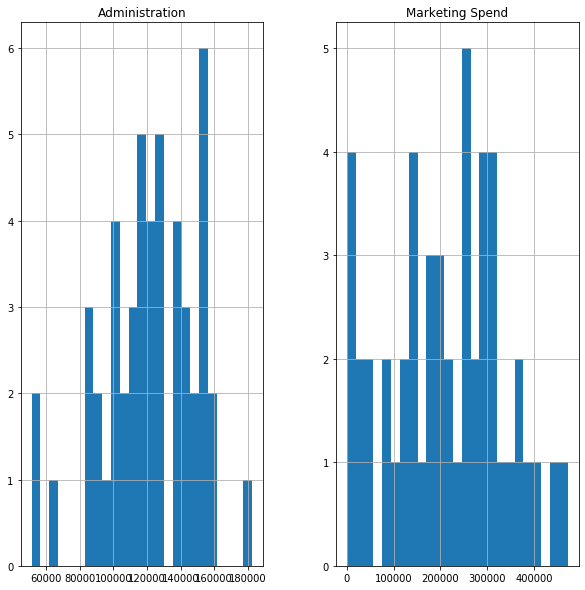

In [194]:
df.iloc[:,1:-1].hist(bins=25,figsize=(10,10))
plt.show()